In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df_08 = pd.read_csv('all_alpha_08.csv')
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [4]:
print(df_08.shape)
print(df_18.shape)

(2404, 18)
(1611, 18)


In [5]:
print(df_08.dtypes)
print(sum(df_08.apply(lambda x: sum(x.isnull().values), axis = 1)>0))
#print(df_08.info())
print(df_08.duplicated().sum())

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object
199
25


In [6]:
print(df_18.dtypes)
print(sum(df_18.apply(lambda x: sum(x.isnull().values), axis = 1)>0))
#print(df_18.info())
print(df_18.duplicated().sum())

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object
2
0


In [7]:
print(df_08["SmartWay"].nunique())
print(df_18["SmartWay"].nunique())
print(df_08["Sales Area"].nunique())
print(df_18["Cert Region"].nunique())
print(df_08["Trans"].nunique())

print(df_08["Cyl"].nunique())
print(df_18["Cyl"].nunique())

2
3
3
2
14
8
7


In [8]:
# Columns Contained in Both pandas DataFrames
print(df_08.columns.intersection(df_18.columns))

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG',
       'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')


In [9]:
# Columns Only Contained in the First pandas DataFrame
print(df_08.columns.difference(df_18.columns))   

Index(['FE Calc Appr', 'Sales Area', 'Unadj Cmb MPG'], dtype='object')


In [10]:
# Columns Only Contained in the Second pandas DataFrame
print(df_18.columns.difference(df_08.columns))

Index(['Cert Region', 'Comb CO2', 'Stnd Description'], dtype='object')


In [11]:
print(df_08["Fuel"].unique())
print(df_18["Fuel"].unique())

['Gasoline' 'ethanol/gas' 'ethanol' 'diesel' 'CNG']
['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas' 'Electricity']


### Drop Extraneous Columns 

In [12]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [13]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1,inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


### Rename Columns

In [14]:
# rename Sales Area to Cert Region
df_08.rename(columns = {'Sales Area':'Cert Region'}, inplace = True)


# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [15]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [16]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [17]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [18]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [19]:
# save new datasets for next section
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

## Filter, Drop, Dedupe 

In [20]:
df_08 = pd.read_csv('data_08_v1.csv')
df_18 = pd.read_csv('data_18_v1.csv')

In [21]:
df_08.shape

(2404, 14)

In [22]:
df_18.shape

(1611, 14)

In [23]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [24]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [25]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [26]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [27]:
df_08.shape

(1084, 13)

In [28]:
df_18.shape

(798, 13)

### Drop Rows with Missing Values 

In [29]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [30]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

### Dedupe Data 

In [31]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [32]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [33]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

In [34]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

23
3


In [35]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [36]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


In [37]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

## Fixing Data Types 

In [38]:
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv')

#### Fix cyl datatype
2008: extract int from string.
2018: convert float to int.

In [40]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [41]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] =  df_08['cyl'].str.extract('(\d+)').astype(int)

In [42]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [43]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [44]:
df_08.to_csv('data_08_v3.csv', index=False)
df_18.to_csv('data_18_v3.csv', index=False)

#### Fix air_pollution_score datatype
2008: convert string to float.
2018: convert int to float.

In [ ]:
df_08 = pd.read_csv('data_08_v3.csv')
df_18 = pd.read_csv('data_18_v3.csv')

Using pandas' to_numeric or astype function to convert the
2008 air_pollution_score column to float -- won't work
 --> ValueError: could not convert string to float: '6/4' 

#### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [45]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [46]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [50]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle


In [51]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [52]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [53]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [54]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [56]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [57]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [58]:
df_08.shape

(988, 13)

In [59]:
# for 2018 dataset
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [60]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [61]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [62]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [63]:
df_18.shape

(832, 13)

In [64]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [65]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [66]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

#### Fix city_mpg, hwy_mpg, cmb_mpg datatypes
2008 and 2018: convert string to float.

In [71]:
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')

In [72]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

#### Fix greenhouse_gas_score datatype
2008: convert from float to int.

In [85]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype('int64')

In [86]:
# Check
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [79]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [87]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [88]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

## Exploring with Visuals 

In [89]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

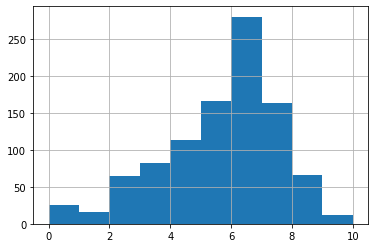

In [91]:
df_08.greenhouse_gas_score.hist();

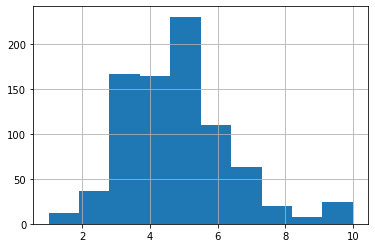

In [92]:
df_18.greenhouse_gas_score.hist();

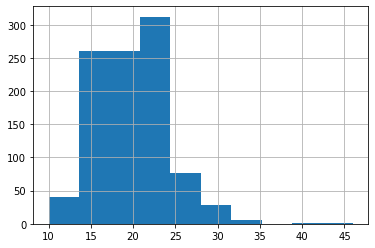

In [93]:
df_08.cmb_mpg.hist();

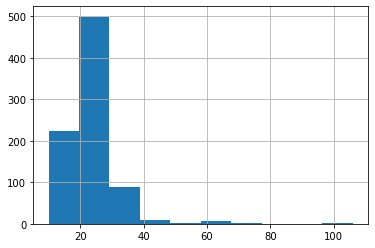

In [94]:
df_18.cmb_mpg.hist();

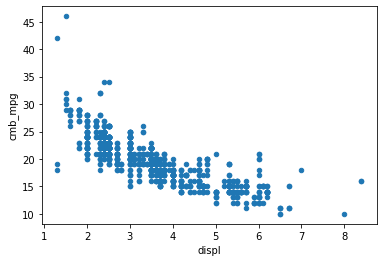

In [95]:
df_08.plot(x="displ", y="cmb_mpg", kind="scatter");

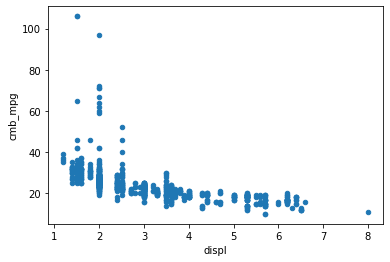

In [96]:
df_18.plot(x="displ", y="cmb_mpg", kind="scatter");

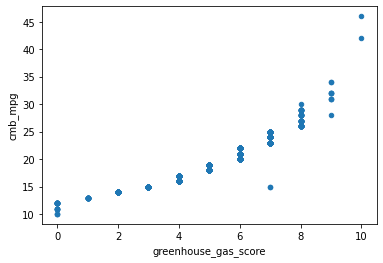

In [97]:
df_08.plot(x="greenhouse_gas_score", y="cmb_mpg", kind="scatter");

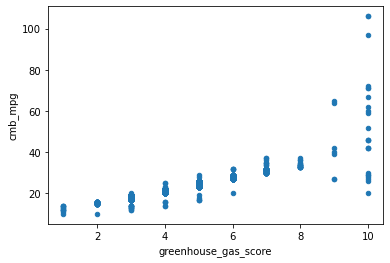

In [98]:
df_18.plot(x="greenhouse_gas_score", y="cmb_mpg", kind="scatter");

## Merging Dataset 

In [3]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [4]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [5]:
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [6]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [7]:
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [8]:
df_combined.to_csv('combined_dataset.csv', index=False)

In [9]:
df = pd.read_csv('combined_dataset.csv')

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [10]:
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [11]:
model_mpg

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000
...,...,...
TOYOTA Yaris,31.500000,32.500000
VOLKSWAGEN Jetta,24.166667,30.000000
VOLKSWAGEN Passat,21.250000,29.000000


### 2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [12]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [13]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [14]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [15]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


Pandas also has a useful [`idxmax`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) function you can use to find the index of the row containing a column's maximum value!

In [17]:
idx = model_mpg.mpg_change.idxmax()
idx

'VOLVO XC 90'

In [18]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64